In [0]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/CoronaWhy/articles_vaccine_covid2019.csv', engine='python')
df

,Article name,Authors- Journal name- Library,number of citations,URL for article
0,[PDF][PDF] Potential COVID-2019 3c-like protea...,"A Zhavoronkov, V Aladinskiy, A Zhebrak… - Insi...",Cited by 13 All 10 versions View as HTML,https://chemrxiv.org/ndownloader/articles/1182...
1,"Current status of epidemiology, diagnosis, the...","DG Ahn, HJ Shin, MH Kim, S Lee, HS Kim… - … of...",Cited by 18 All 12 versions View as HTML,http://www.papersearch.net/thesis/article.asp?...
2,[PDF][PDF] Immune responses in COVID-19 and po...,"E Prompetchara, C Ketloy, T Palaga - Asian Pac...",Cited by 111 All 18 versions View as HTML,http://apjai-journal.org/wp-content/uploads/20...
3,COVID‐2019: the role of the nsp2 and nsp3 in i...,"S Angeletti, D Benvenuto, M Bianchi… - Journal...",Cited by 43 All 10 versions,https://onlinelibrary.wiley.com/doi/abs/10.100...
4,Research and development on therapeutic agents...,"C Liu, Q Zhou, Y Li, LV Garner, SP Watkins, LJ...",Cited by 65 All 11 versions,https://pubs.acs.org/doi/abs/10.1021/acscentsc...
...,...,...,...,...
925,First-wave COVID-19 transmissibility and sever...,"K Leung, JT Wu, D Liu, GM Leung - The Lancet, ...",Cited by 27 All 12 versions,https://www.sciencedirect.com/science/article/...
926,Smartphones as mobile microbiological laborato...,"DSY Ong, M Poljak - Clinical Microbiology and ...",Cited by 3 Related articles All 6 versions,https://www.sciencedirect.com/science/article/...
927,[HTML][HTML] Viral load dynamics and disease s...,"S Zheng, J Fan, F Yu, B Feng, B Lou, Q Zou, G ...",Cited by 3 All 8 versions,https://www.bmj.com/content/369/bmj.m1443.full
928,Characterisation of the transcriptome and prot...,"AD Davidson, MK Williamson, S Lewis, D Shoemar...",Cited by 4 All 4 versions View as HTML,https://www.biorxiv.org/content/10.1101/2020.0...


In [0]:
!pip install ratelimit
# Do set the global variables before running the script 
!python '/content/drive/My Drive/CoronaWhy/Python scripts/Twitter_Search_forthe_modified_table_obtained_from_dataminer.py'

In [0]:
tweets = pd.read_csv('/content/drive/My Drive/CoronaWhy/Inferred datasets/tweets_articles_vaccine_covid2019.csv')
tweets

# Data cleaning

In [0]:
# converting the column into a text file
tweets_list = tweets.text

tweets_text = (" ").join(tweets_list)

In [0]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_tweets_text_round1(tweets_text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    tweets_text = tweets_text.lower()
    tweets_text = re.sub('\[.*?\]', '', tweets_text)
    tweets_text = re.sub('[%s]' % re.escape(string.punctuation), '', tweets_text)
    tweets_text = re.sub('\w*\d\w*', '', tweets_text)
    return tweets_text

round1 = lambda x: clean_tweets_text_round1(x)

In [0]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(tweets.text.apply(round1))
data_clean

,text
0,rt sciencecited themessengerdrg moderan sars v...
1,update report der american chemical society s...
2,themessengerdrg spike protein receptor bindin...
3,themessengerdrg moderan sars vaccine patent\nh...
4,preliminary identification of potential vaccin...
...,...
2665,cagovernor evidence that vitamin d supplementa...
2666,paulschmehl i forgot to give you this link to ...
2667,rt thelonevirologi epidemiologic features and ...
2668,rt thelonevirologi epidemiologic features and ...


In [0]:
# Apply a second round of cleaning
def clean_tweets_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_tweets_text_round2(x)

In [0]:
# Let's take a look at the updated text
tweets_cleaned = pd.DataFrame(data_clean.text.apply(round2))
tweets_cleaned

,text
0,rt sciencecited themessengerdrg moderan sars v...
1,update report der american chemical society s...
2,themessengerdrg spike protein receptor bindin...
3,themessengerdrg moderan sars vaccine patenthtt...
4,preliminary identification of potential vaccin...
...,...
2665,cagovernor evidence that vitamin d supplementa...
2666,paulschmehl i forgot to give you this link to ...
2667,rt thelonevirologi epidemiologic features and ...
2668,rt thelonevirologi epidemiologic features and ...


# Sentiment Analysis

In [0]:
# Create quick lambda functions to find the polarity and subjectivity
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

tweets_cleaned['polarity'] = tweets_cleaned['text'].apply(pol)
tweets_cleaned['subjectivity'] = tweets_cleaned['text'].apply(sub)
tweets_cleaned

,text,polarity,subjectivity
0,rt sciencecited themessengerdrg moderan sars v...,0.0,0.000000
1,update report der american chemical society s...,0.0,0.166667
2,themessengerdrg spike protein receptor bindin...,0.0,0.250000
3,themessengerdrg moderan sars vaccine patenthtt...,0.0,0.250000
4,preliminary identification of potential vaccin...,0.0,1.000000
...,...,...,...
2665,cagovernor evidence that vitamin d supplementa...,0.0,0.000000
2666,paulschmehl i forgot to give you this link to ...,0.0,1.000000
2667,rt thelonevirologi epidemiologic features and ...,0.0,0.000000
2668,rt thelonevirologi epidemiologic features and ...,0.0,0.000000


In [0]:
tweets_cleaned.insert(0, 'New_ID', range(1, 1 + len(tweets_cleaned)))
tweets_cleaned

,New_ID,text,polarity,subjectivity
0,1,rt sciencecited themessengerdrg moderan sars v...,0.0,0.000000
1,2,update report der american chemical society s...,0.0,0.166667
2,3,themessengerdrg spike protein receptor bindin...,0.0,0.250000
3,4,themessengerdrg moderan sars vaccine patenthtt...,0.0,0.250000
4,5,preliminary identification of potential vaccin...,0.0,1.000000
...,...,...,...,...
2665,2666,cagovernor evidence that vitamin d supplementa...,0.0,0.000000
2666,2667,paulschmehl i forgot to give you this link to ...,0.0,1.000000
2667,2668,rt thelonevirologi epidemiologic features and ...,0.0,0.000000
2668,2669,rt thelonevirologi epidemiologic features and ...,0.0,0.000000


KeyError: ignored

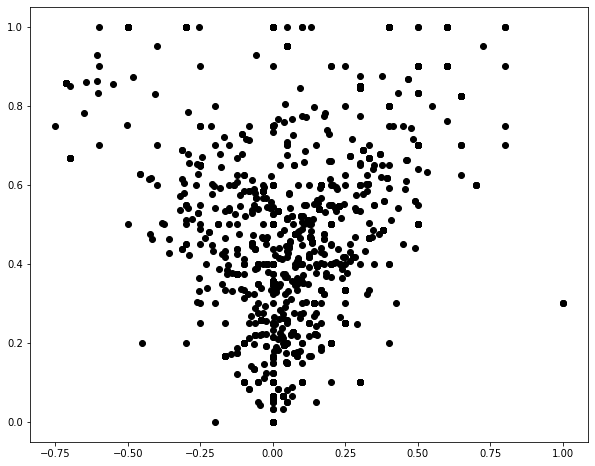

In [0]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, ids in enumerate(tweets_cleaned.New_ID):
    x = tweets_cleaned.polarity
    y = tweets_cleaned.subjectivity
    plt.scatter(x, y, color='black')
    plt.text(x+.001, y+.001, tweets_cleaned[index], fontsize=10)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()